In [1]:
## In this notebook we will solve a binary classification problem 
## with logistic regression using yodf
## Two features are test results on samples and there is
## a binary label which tells if sample passes QA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yodf as tf
import time

(118, 2) (60, 2) (58, 2) (118, 1)


[]

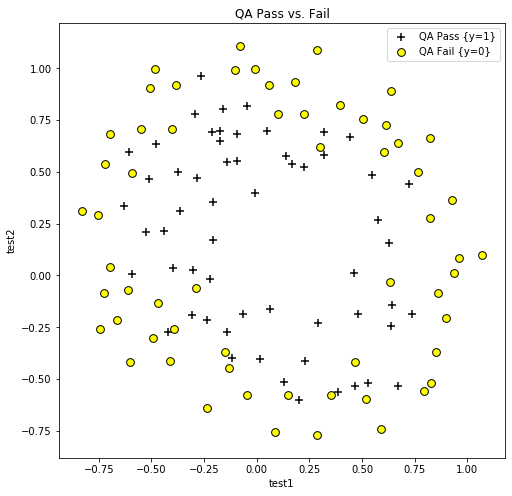

In [3]:
# - add higher order features (upto order) to a 2 feature matrix X
# - add add first dummy feature column
def add_features(X, order):
    for i in range(2, order+1):
        for j in range(0, i+1):
            powerx1 = j
            powerx2 = i-j
            X = np.c_[X, np.power(X[:,0:1], powerx1) * np.power(X[:,1:2], powerx2)]
    X = np.c_[np.ones([X.shape[0], 1]), X]
    return X

data = np.genfromtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:]
X1 = X[data[:,2] == 0]
X2 = X[data[:,2] == 1]
print(X.shape, X1.shape, X2.shape, y.shape)

plt.figure(figsize=(8,8))
axes = plt.gca()
axes.set_xlabel('test1')
axes.set_ylabel('test2')

plt.scatter(X2[:,0:1], X2[:,1:2], marker='+', color='black', s=60, label='QA Pass {y=1}')
plt.scatter(X1[:,0:1], X1[:,1:2], marker='o', edgecolor='black', color='yellow', s=60, label='QA Fail {y=0}')
plt.title('QA Pass vs. Fail')
plt.legend(loc='upper right')
plt.plot()

In [4]:
def plot_decision_boundary(theta, data, X, y, title, degree):
    axes = plt.gca()
    axes.set_xlabel('test1')
    axes.set_ylabel('test2')
    X1 = X[data[:,2] == 0]
    X2 = X[data[:,2] == 1]
    plt.scatter(X2[:,1:2], X2[:,2:3], marker='+', s=60, color='black', label='y = 1 (QA pass)')
    plt.scatter(X1[:,1:2], X1[:,2:3], marker='o', s=60, color='yellow', edgecolor='black', label='y = 0 (QA fail)')
    plt.legend(loc='upper right')
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((u.size, v.size))
    # Evaluate z = theta*x over the grid
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            features = np.array([[ui, vj]])
            z[i, j] = np.dot(add_features(features, degree), theta)

    # Needed as we are not passing 2-D arrays
    # to contour as first two arguments
    z = z.T

    plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
    plt.title(title)

Weights shape: (28, 1)
Execution Time: 0.313 seconds.
Accuracy: 83.05%
Sum of weights: -11.090869669730118


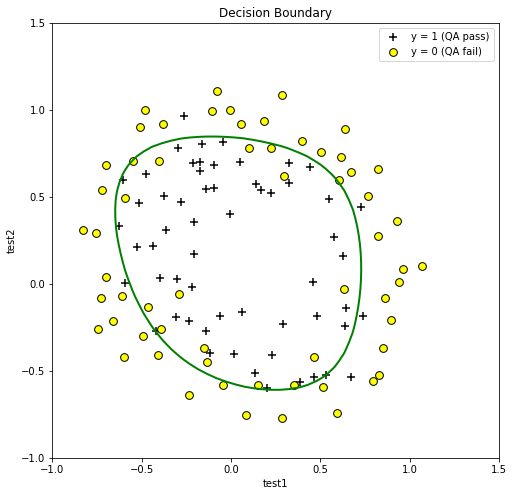

In [5]:
def sigmoid(x):
    return 1/(1+np.e**-x)

def predict(W, X):
    p = np.round(sigmoid(X.dot(W)))
    return p

data = np.genfromtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:3]

# Adding features to X so that it has upto 6 order polynomials
# and a dummy feature having all ones
degree = 6
X = add_features(X, degree)

W = tf.Variable(np.zeros((X.shape[1],1)))
print(f"Weights shape: {W.shape}")

h = tf.sigmoid(tf.matmul(X, W))
cost = -tf.log(h)*y-tf.log(1-h)*(1-y)
cost = tf.reduce_mean(cost)

learning_rate = 1
iterations = 100

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

start_time = time.time()

init = tf.global_variables_initializer()
with tf.Session() as s:
    s.run(init)
    costs = []
    for _ in range(iterations):
        cost_final, _, W_final = s.run([cost, train, W])
        costs.append(cost_final)

end_time = time.time()
print(f"Execution Time: {end_time-start_time:0.3f} seconds.")

y_predicted = predict(W_final, X)
print(f"Accuracy: {np.mean(y == y_predicted)*100:0.2f}%")
# Another way to verify Tensorflow and yodf results
print(f"Sum of weights: {np.sum(W_final)}")

plt.figure(figsize=(8,8))
plot_decision_boundary(W_final, data, X, y, "Decision Boundary", degree)
plt.show()